In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def genPlot(fname,df,l):
    plt.plot(df["time"],df["fidelity"],'o-')
    plt.xlabel("T/Tmin")
    plt.ylabel("Fidelity")
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)

## Number operator Coupling Comparison 

Now we will see if we achieve a speed up with the coupling as the number operator for qubit and qutrit systems respectively. 

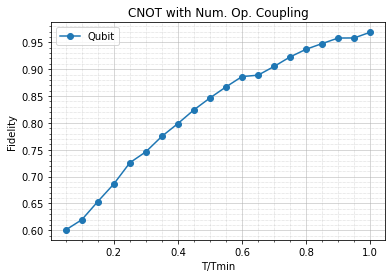

In [4]:
NQB_DF = pd.read_csv("Data/CNOT_NOP/CNOT/CNOT_Qubit_nop.csv",names=["fidelity","time"])
NQB_DF.sort_values(by="time",inplace=True)
genPlot("CNOT with Num. Op. Coupling",NQB_DF,["Qubit"])

This graph looks rather valid, as we are nearly saturating the speed limit at our specified $T_{min}$. Now lets compare it to the Qutrit case 

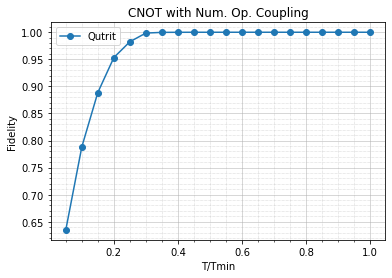

In [5]:
NQT_DF = pd.read_csv("Data/CNOT_NOP/CNOT/CNOT_Qutrit_nop.csv",names=["fidelity","time"])
NQT_DF.sort_values(by="time",inplace=True)
genPlot("CNOT with Num. Op. Coupling",NQT_DF,["Qutrit"])

Wonderful!! We do see a speed up on the Qutrit system. Comparing the two, we have 

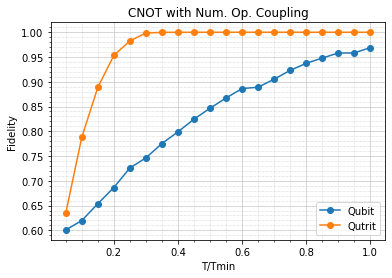

In [6]:
genPlot("CNOT with Num. Op. Coupling",NQB_DF,["Qubit"])
genPlot("CNOT with Num. Op. Coupling",NQT_DF,["Qubit","Qutrit"])

Yet this speed up may be artifical, similar to the Ashabb one. This is beacuse the coupling Hamiltonian as it has eigenvalues larger than one (with the largest being 4). Thus this may not be correct comparison to the qubit system. To make this more of an even comparison, we will do two things. First, we will just multiply our Hamiltonian by 1/4 so that the largest eigenvalue is 1. Another way is to make all non-zero values equal to one. We will show the graphs for both of these systems. 

For the coupling Hamitlonian that is scaled with a factor of $1/4$, we have 

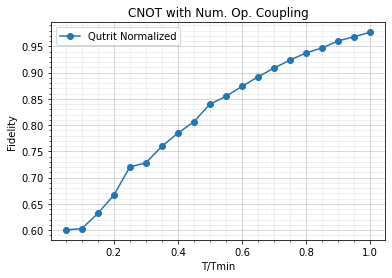

In [7]:
NNQT_DF = pd.read_csv("Data/NOP_Rerun/CNOT/CNOT_Qutrit_nop.csv",names=["fidelity","time"])
NNQT_DF.sort_values(by="time",inplace=True)
genPlot("CNOT with Num. Op. Coupling",NNQT_DF,["Qutrit Normalized"])

This graph seems much more like the qubit system. Graphing all systems together, we have 

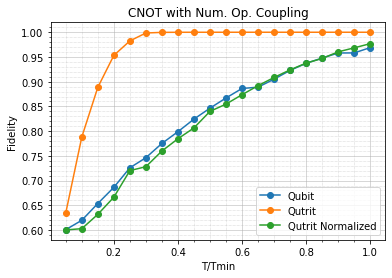

In [8]:
genPlot("CNOT with Num. Op. Coupling",NQB_DF,["Qubit"])
genPlot("CNOT with Num. Op. Coupling",NQT_DF,["Qubit","Qutrit"])
genPlot("CNOT with Num. Op. Coupling",NNQT_DF,["Qubit","Qutrit","Qutrit Normalized"])

Hence we see the expected behavior. When the Qutrit system has normalized eigenvalues, there is no speed up when compared to the qubit system. Hence the speed up seen in the above orange graph must come from the increased coupling strength rather than any novel behavior with multi-level systems. 

Yet, before we come to any conclusions, lets look at the case where all the values in the coupling Hamiltonian are 1. This is different than the above case, as when we scale our coupling Hamiltonain by $1/4$, we are only making the largest eigenvalue equal to 1. Non-maximal eigenvalues are going to be less than one, and thus this may impact the speed up of our system. A more apt comparison is when all eigenvalues have magnitude 1. While this is not the natural extension of the number operator into the qutrit system, it seems to be the most true comparison between qubit and qutrit systems. 

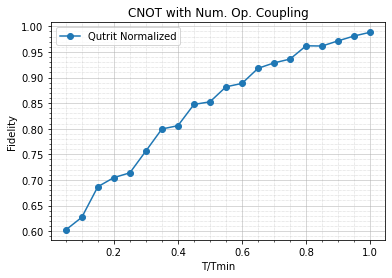

In [9]:
ONQT_DF = pd.read_csv("Data/NOP_Rerun/CNOT/CNOT_Qutrit_nop2.csv",names=["fidelity","time"])
ONQT_DF.sort_values(by="time",inplace=True)
genPlot("CNOT with Num. Op. Coupling",ONQT_DF,["Qutrit Normalized"])

This looks marignally better than the normalized coupling Hamiltonian. Graphing everything together, we have

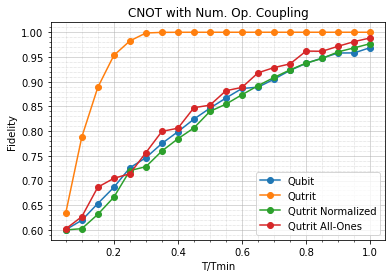

In [10]:
genPlot("CNOT with Num. Op. Coupling",NQB_DF,["Qubit"])
genPlot("CNOT with Num. Op. Coupling",NQT_DF,["Qubit","Qutrit"])
genPlot("CNOT with Num. Op. Coupling",NNQT_DF,["Qubit","Qutrit","Qutrit Normalized"])
genPlot("CNOT with Num. Op. Coupling",ONQT_DF,["Qubit","Qutrit","Qutrit Normalized","Qutrit All-Ones"])

While we do see a slight speed up compared to the qubit case, the all ones coupling Hamiltonian does not give enough of a speed up to be relavent. Thus it seems as though the number operators do not provide any speed up, but one area that may provide promise is looking at different ways to extend the number operator into the qutrit space while keeping the eigenvalues normalized. 

## State-Transfer Protocol 

Now we will look at the a state-transfer protocol that takes the state 

\begin{equation*}
    |00> \to \frac{1}{\sqrt{2}}(|00> + |11>).
\end{equation*}

Adapting our code to the protocol is actually quite easy. First we note that we are generating a time evolution of our Hamiltonian to generate a target gate in Alex and I's code. We will denote this time evolution as some unitary $U$. Now we will denote our state transfer as 

\begin{equation*}
     U|00> = \frac{1}{\sqrt{2}}(|00> + |11>).
\end{equation*}

And we will use the same pyTorch optimization framework for the parameteterized time evolution unitary. Let $|\psi> = U|00>$ and $|\phi> = 1/\sqrt{2}(|00>+ |11>)$. We will calculate our minimization parameter (i.e. fidelity) by taking 

\begin{equation*}
     F = |<\phi|\psi>|^2.
\end{equation*}

and use our infidelity as our cost (minimization) function. Initial testing shows convergence for $99.99\%$ fidelity! (see Qutrit_ML.ipynb) There is also a natura extension of this protcol to the qutrit space as well, where we also see convergence. Now graphing the state-transfer protocol for the qubit and qutrit systems, we have 

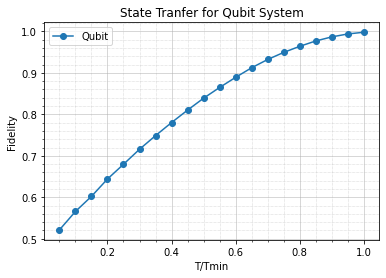

In [24]:
ST_QB_DF = pd.read_csv("Data/StateTrans/qubit/Qubit.csv",names=["fidelity","time"])
ST_QB_DF.sort_values(by="time",inplace=True)
genPlot("State Tranfer for Qubit System",ST_QB_DF,["Qubit"])

Here we see good convergence to $99.99\% >$ for a $T_{min} = \pi$. Note that we are using the number operator coupling that was previously explored in the above section. Now let's look at the qutrit case. 

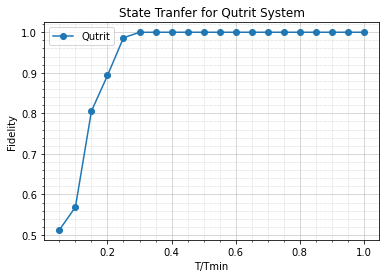

In [25]:
ST_QT_DF = pd.read_csv("Data/StateTrans/num_op/num_op_Qutrit.csv",names=["fidelity","time"])
ST_QT_DF.sort_values(by="time",inplace=True)
genPlot("State Tranfer for Qutrit System",ST_QT_DF,["Qutrit"])

Now we do see a significant speed up. But let's note that the qutrit number operator coupling has eigenvalues that are greater than one. Thus a speed up is to be expected. But this is a very signficant speed up, even more than the speed up for the $CNOT$ gate with the same coupling. 

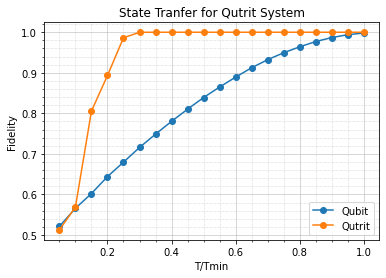

In [26]:
genPlot("State Tranfer for Qubit System",ST_QB_DF,["Qubit"])
genPlot("State Tranfer for Qutrit System",ST_QT_DF,["Qubit","Qutrit"])

A good question is whether some speed up is still present when the coupling matrix has eigenvalues of 1 or less. We will look at the same types of coupling matrices that we explored before. The first being a scaling of $H_0$ by $1/4$ and the other with all entries being one. 

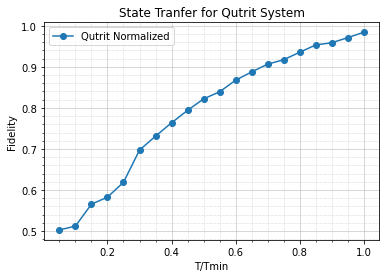

In [27]:
ST_QTN_DF = pd.read_csv("Data/StateTrans/normalized/normalized_Qutrit.csv",names=["fidelity","time"])
ST_QTN_DF.sort_values(by="time",inplace=True)
genPlot("State Tranfer for Qutrit System",ST_QTN_DF,["Qutrit Normalized"])

This does not look very promising, but comparing everything we have 

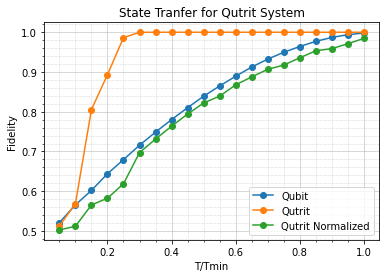

In [28]:
genPlot("State Tranfer for Qubit System",ST_QB_DF,["Qubit"])
genPlot("State Tranfer for Qutrit System",ST_QT_DF,["Qubit","Qutrit"])
genPlot("State Tranfer for Qutrit System",ST_QTN_DF,["Qubit","Qutrit","Qutrit Normalized"])

Now we see an actual speed down with the normalized coupling matrix. Yet, this is not outlandish, as any of the eigenvalues are scaled to be less than 1. Let's look at the case where all the entries are 1 for $H_0$. 

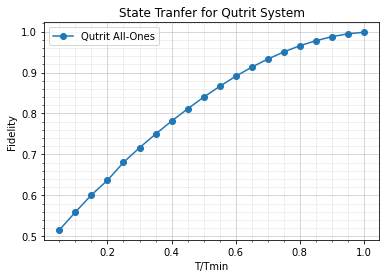

In [29]:
ST_QTO_DF = pd.read_csv("Data/StateTrans/ones/ones_Qutrit.csv",names=["fidelity","time"])
ST_QTO_DF.sort_values(by="time",inplace=True)
genPlot("State Tranfer for Qutrit System",ST_QTO_DF,["Qutrit All-Ones"])

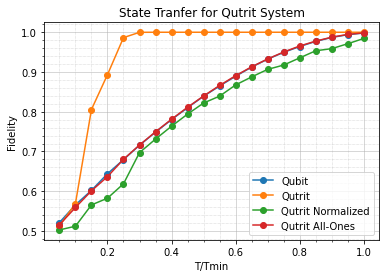

In [30]:
genPlot("State Tranfer for Qubit System",ST_QB_DF,["Qubit"])
genPlot("State Tranfer for Qutrit System",ST_QT_DF,["Qubit","Qutrit"])
genPlot("State Tranfer for Qutrit System",ST_QTN_DF,["Qubit","Qutrit","Qutrit Normalized"])
genPlot("State Tranfer for Qutrit System",ST_QTO_DF,["Qubit","Qutrit","Qutrit Normalized","Qutrit All-Ones"])

We see that the Qutrit system with a coupling matrix of all ones is the nearly identical to the qubit system. This is quite unforuante as we do not see any major speed up with the state-transfer protocol. 

## Fixed Qubit Comparison to Ashabb

I have fixed the qubit comparison to the Ashabb Coupling by using the $XX$ coupling with a $T_{min} = \pi/4$. Graphing these two plots we have 

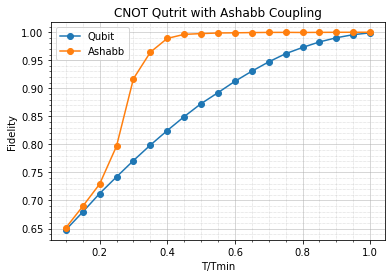

In [18]:
CNOT_DF = pd.read_csv("Data/CNOT_Qubit/CNOT/CNOT_Qubit.csv",names=["fidelity","time"])
CNOT_DF.sort_values(by="time",inplace=True)
CNOT_DF = CNOT_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",CNOT_DF,["CNOT Qubit"])

CNOT_A_DF = pd.read_csv("RandomSeed_Output/CNOT/CNOT_Ashabb.csv",names=["fidelity","time"])
CNOT_A_DF.sort_values(by="time",inplace=True)
CNOT_A_DF = CNOT_A_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qutrit with Ashabb Coupling",CNOT_A_DF,["Qubit","Ashabb"])

Now this seems like a much more apt comparison between the Qubit and Ashabb systems. We know that by the eigenvalues of the Ashabb Coupling Hamiltonian that the speed up is bounded by a $g=3$ plot for a qubit, and it should be rather intuitive to see this extension. 